## Manasi Kulkarni - Problem Set 4
### Collaborators: Pratik Damania, Prem Shah, Aditya Wakade, Gaurav Gohil

In [2]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
#I am importing the seaborn package because it gives nice viz
import seaborn as sns

%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from decimal import Decimal
import statsmodels.formula.api as smf
import time
from matplotlib.colors import ListedColormap

/Users/manasi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1.1 Loading the data
In this step I am loading the data from the Wisconsin Data set. I am also creating a duplicate record which encodes the y value as 0 and 1 depending upon the state of the tumor. I have also dropped the ID column.

In [3]:
#Load the data set and carrying out general analysis
data = pd.read_csv('wdbc.csv')
print(data.shape)
print(data.columns)
print(data.dtypes)
data=data.drop(['id'], axis=1)

(569, 32)
Index(['id', 'diagnosis', 'radius.mean', 'texture.mean', 'perimeter.mean',
       'area.mean', 'smoothness.mean', 'compactness.mean', 'concavity.mean',
       'concpoints.mean', 'symmetry.mean', 'fracdim.mean', 'radius.se',
       'texture.se', 'perimeter.se', 'area.se', 'smoothness.se',
       'compactness.se', 'concavity.se', 'concpoints.se', 'symmetry.se',
       'fracdim.se', 'radius.worst', 'texture.worst', 'perimeter.worst',
       'area.worst', 'smoothness.worst', 'compactness.worst',
       'concavity.worst', 'concpoints.worst', 'symmetry.worst',
       'fracdim.worst'],
      dtype='object')
id                     int64
diagnosis             object
radius.mean          float64
texture.mean         float64
perimeter.mean       float64
area.mean            float64
smoothness.mean      float64
compactness.mean     float64
concavity.mean       float64
concpoints.mean      float64
symmetry.mean        float64
fracdim.mean         float64
radius.se            float64
textu

In [3]:
#Printing out the data after dropping the ID column
data.head(10)

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750



## 1.2 Summary Section
This is a summary section for the Wisconsin dataset. This shows the number of malignant and benign tumor count. It also shows the description of the various columns. 

In total out of 569 columns, there are 212 malignant tumors and 357 benign tumors. Also, there are no null values in the columns

In [5]:
# Summary statistic and coorelation table
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())

print("The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[1], 
                                                                                 diagnosis_categories[0]))

The data has 569 diagnosis, 212 malignant and 357 benign.


In [6]:
data.describe()

,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,fracdim.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
#Calculating the null values in a dataset
data.isnull().sum()

diagnosis            0
radius.mean          0
texture.mean         0
perimeter.mean       0
area.mean            0
smoothness.mean      0
compactness.mean     0
concavity.mean       0
concpoints.mean      0
symmetry.mean        0
fracdim.mean         0
radius.se            0
texture.se           0
perimeter.se         0
area.se              0
smoothness.se        0
compactness.se       0
concavity.se         0
concpoints.se        0
symmetry.se          0
fracdim.se           0
radius.worst         0
texture.worst        0
perimeter.worst      0
area.worst           0
smoothness.worst     0
compactness.worst    0
concavity.worst      0
concpoints.worst     0
symmetry.worst       0
fracdim.worst        0
dtype: int64

In [7]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())

print("The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))

The data has 569 diagnosis, 357 malignant and 212 benign.


In [8]:
features_mean= list(data.columns[1:11])

In [9]:
data[features_mean].corr()

,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,fracdim.mean
radius.mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture.mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter.mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area.mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness.mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness.mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity.mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concpoints.mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry.mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fracdim.mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


## 1.3 Plotting the Coorelations
Here, I have made a list of features mean which consists of all the features that I felt were substantial for this analysis i.e all the means. We can see from the coorelation plot that radius and perimeter are highly coorelated. Noteworthy are, negative coorelations between fracdim mean and radius,texture and perimeter mean.

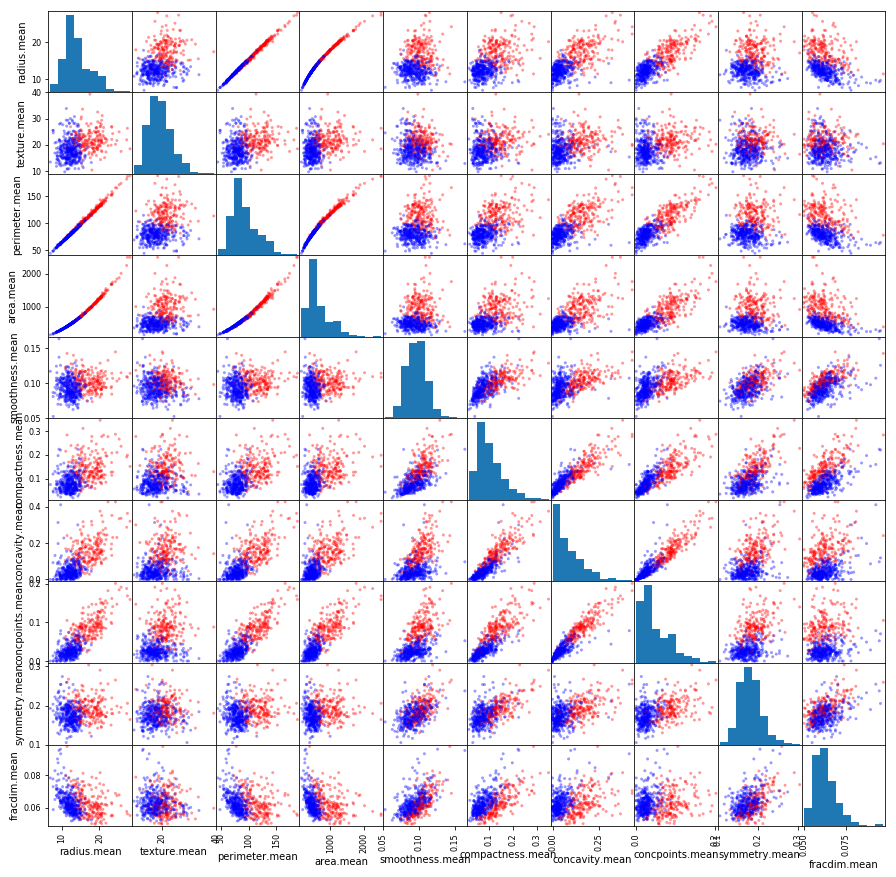

In [10]:

color_dic = {'M':'red', 'B':'blue'}
colors = data['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

In [9]:
data1=data
data1 = sp.array(data)
data1

array([['M', 17.99, 10.38, ..., 0.2654, 0.4601, 0.1189],
       ['M', 20.57, 17.77, ..., 0.18600000000000003, 0.275, 0.08902],
       ['M', 19.69, 21.25, ..., 0.243, 0.3613, 0.08757999999999999],
       ..., 
       ['M', 16.6, 28.08, ..., 0.1418, 0.2218, 0.0782],
       ['M', 20.6, 29.33, ..., 0.265, 0.4087, 0.124],
       ['B', 7.76, 24.54, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [10]:
X=data1[0:,1:33]
X=X.astype(np.float)

In [11]:
y = data1[0:, 0]


In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y) 
y = label_encoder.transform(y)


## 2.1 Decision Boundary by kNN

In [13]:
#Splitting the data into training and test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


/Users/manasi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier()

In [15]:
#Performing Parameter tuning.
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
#We pick two features that showed a strong coorelation with diagnosis. I have taken Radius and Texture. 
#Now I try to fit the kNN model using these specific X and Y
knn.fit(X_train[:,0:2], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
# Create color maps. Code reference: Stack Overflow
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#ffaaaa','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#0000FF'])

In [20]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05

In [21]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [22]:
xy_mesh=np.c_[xx.ravel(),yy.ravel()]

In [23]:
Z=knn.predict(xy_mesh)
Z = Z.reshape(xx.shape)

Text(0.5,1,'KNN')

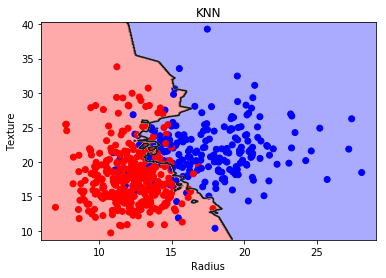

In [24]:
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.contour(xx,yy,Z,cmap=plt.cm.RdGy)
ax=plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xlabel('Radius')
plt.ylabel('Texture')
plt.title('KNN')

Thoughts about kNN: We saw that this algorithm is very flexible because it does not assume that the data fits a specific model. However, it is also vulnerable to noise: If there are a few mislabeled points in the initial data set then new points near these will be misclassified. This can be thought of as a form of overfitting. Swotching to kNN could reduce the chance of overfitting but it largely depends on what value of k is being set. In particular, if we have a very large data set but we choose K to be too small, then we will still run the risk of overfitting. 

## 2.2 Logistic Regression

Text(0.5,1,'Logistic Regression')

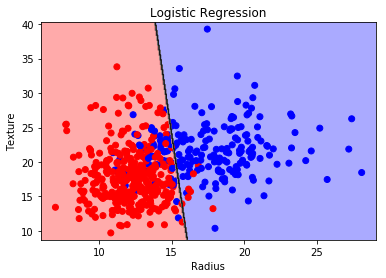

In [25]:
from sklearn import metrics
from sklearn import cross_validation as cv
log=LogisticRegression(C=1)
log.fit(X_train, y_train)
log.fit(X_train[0:,0:2], y_train)
Z = log.predict(xy_mesh)
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.contour(xx,yy,Z,cmap=plt.cm.RdGy)
ax=plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xlabel('Radius')
plt.ylabel('Texture')
plt.title('Logistic Regression')

Thoughts about Logistic Regression: Looking at it the boundary is not as precise as kNN. But it picks up noise lesser I presume. It seems like a pretty well-behaved classification algorithm that can be trained as long as you expect your features to be roughly linear and the problem to be linearly separable. It sets a baseline to additional further complex analysis. 

The accuracy score indicated that Logistic performed better than kNN


## 2.3 Feature Engineering

We can't use more than 2 features and plot it in a 2 Dimensional space. Considering my first two features constant, I added two additional features that were the squares of the first two. I used Principle Component Analysis to decompose these four features into 2 and plotted them on a graph.

In [46]:
#We are now using these two features to compute additional features. I am using the calculation for X^2 and Y^2
#Given our training set, let;s put it into another dataframe
data2=data
data2['radius_square']=(data['radius.mean']**2)
data2['texture_square']=(data['texture.mean']**2)
data2=data2[['diagnosis','radius.mean','texture.mean','radius_square','texture_square']]
data2.head(10)

,diagnosis,radius.mean,texture.mean,radius_square,texture_square
0,M,17.99,10.38,323.6401,107.7444
1,M,20.57,17.77,423.1249,315.7729
2,M,19.69,21.25,387.6961,451.5625
3,M,11.42,20.38,130.4164,415.3444
4,M,20.29,14.34,411.6841,205.6356
5,M,12.45,15.70,155.0025,246.4900
6,M,18.25,19.98,333.0625,399.2004
7,M,13.71,20.83,187.9641,433.8889
8,M,13.00,21.82,169.0000,476.1124
9,M,12.46,24.04,155.2516,577.9216


In [50]:
#Seperating the X and Y values
X2=data2.iloc[0:,1:5].values
y2= data2.iloc[0:, 0].values

In [51]:
#Label Encoding y to only contain 1's and 0's
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y2) 
y2 = label_encoder.transform(y2)

In [52]:
#Scaling
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X2 = scaler.fit_transform(X2)

In [53]:
#Splitting this into train and test
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)

In [54]:
#Using PCA to decompose the features
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X2_train)
X2_train = pca_model.transform(X2_train)
X2_test = pca_model.transform(X2_test)

# 2-Dimensions
X2_train[:5]

array([[ 0.3281289 ,  0.42614506],
       [ 0.02428422, -0.03660902],
       [ 0.03293905,  0.0104308 ],
       [-0.26470991,  0.00697412],
       [-0.16907562,  0.00138649]])

In [55]:
#Fitting using a logistic model
from sklearn import metrics
from sklearn import cross_validation as cv
log2=LogisticRegression(C=1)
log2.fit(X2_train, y2_train)
log2.fit(X2_train[:,0:2], y2_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
x2_min, x2_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y2_min, y2_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
h=0.05
#print(x2_min)
xx2, yy2 = np.meshgrid(np.arange(x2_min, x2_max, h),np.arange(y2_min, y2_max, h))
xy2_mesh=np.c_[xx2.ravel(),yy2.ravel()]
Z2 = log2.predict(xy2_mesh)
Z2 = Z2.reshape(xx2.shape)

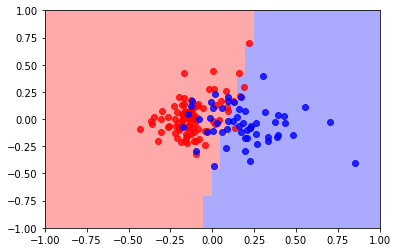

In [57]:
plt.pcolormesh(xx2,yy2,Z2,cmap=cmap_light)
#plt.contourf(xx2, yy2, Z2, cmap=cmap_light)
#plt.contour(xx2,yy2,Z2,cmap=plt.cm.RdGy)
#plt.axis('tight')
colors = {0: 'red', 1: 'blue'}
# Plot your testing points as wel
for label in np.unique(y2_test):
    indices = np.where(y2_test == label)
    plt.scatter(X2_test[indices, 0], X2_test[indices, 1],c=colors[label], alpha=0.8)

plt.ylim(-1,1)
plt.xlim(-1,1)
plt.show()

## 3.1 Cross Validation

In [115]:
data.drop(data.index[range(1,100)]).head(10)

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst,radius_square,texture_square
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,323.640100,107.7444
100,M,13.610,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,...,108.60,906.5,0.1265,0.19430,0.31690,0.11840,0.2651,0.07397,185.232100,624.0004
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,...,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382,48.734361,180.3649
102,B,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,...,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878,148.352400,421.0704
103,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,...,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490,97.535376,376.3600
104,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,...,74.22,402.8,0.1219,0.14860,0.07987,0.03203,0.2826,0.07552,110.040100,372.1041
105,M,13.110,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.09601,0.1925,...,106.40,827.2,0.1862,0.40990,0.63760,0.19860,0.3147,0.14050,171.872100,242.1136
106,B,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097,135.489600,335.9889
107,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,...,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185,152.769600,343.7316
108,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,...,206.80,2360.0,0.1701,0.69970,0.96080,0.29100,0.4055,0.09789,495.952900,386.9089


First we make a function which returns us test and train samples based on certain row values we give

In [59]:
def sampler(i,j,data):
    x = data[i:j]
    y = data.drop(data.index[range(i,j)])
    return(x,y) 


test, train = sampler(98,107, data)

We now make a k fold cross validation function which accepts number of k, data, target variable, penalty

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def kfoldcv(k, data, pen):
    results = pd.DataFrame(columns = ["accuracy", "precision", "recall"])
    results
    i = 0
    d = int(np.floor(len(data)/k))
    j = d
    for i in range(0,k):
        #If we are in the last iteration
        if(i == k-1):
            test, train = sampler(len(data) - d, len(data), data)
            x_train = train[train.columns[1:len(train.columns)]]
            y_train = train.diagnosis
            x_test = test[test.columns[1:len(train.columns)]]
            y_test = test.diagnosis
            model = LogisticRegression(penalty = pen).fit(x_train, y_train)
            label_predict = model.predict(x_test)
            t1 = accuracy_score(y_test, label_predict)
            t2 = precision_score(y_test, label_predict, average = 'macro')
            t3 = recall_score(y_test, label_predict, average = 'macro')
            idx = len(results) + 1
            results.loc[idx] = [t1,t2,t3]
        else:
            test, train = sampler(i, j, data)
            x_train = train[train.columns[1:len(train.columns)]]
            y_train = train.diagnosis
            x_test = test[test.columns[1:len(train.columns)]]
            y_test = test.diagnosis
            model = LogisticRegression(penalty = pen).fit(x_train, y_train)
            label_predict = model.predict(x_test)
            t1 = accuracy_score(y_test, label_predict)
            t2 = precision_score(y_test, label_predict, average = 'macro')
            t3 = recall_score(y_test, label_predict, average = 'macro')
            idx = len(results) + 1
            results.loc[idx] = [t1,t2,t3]
            i = i+ d
            j = j + d
    idx = len(results) + 1
    t1 =np.mean(results['accuracy'])
    t2 = np.mean(results['precision'])
    t3 = np.mean(results['recall'])
    results.loc[idx] = [t1,t2,t3] 
    #results.rename({11: 'Average'}, axis='index')
    return(results)

res = kfoldcv(10, data, 'l1')
res                 

,accuracy,precision,recall
1,0.875000,0.805556,0.922222
2,0.918919,0.915094,0.932836
3,0.915663,0.922591,0.918169
4,0.914027,0.922265,0.916380
5,0.920290,0.927564,0.920290
6,0.927492,0.937581,0.921142
7,0.937824,0.951020,0.927273
8,0.952381,0.963158,0.940678
9,0.925403,0.922868,0.918386
10,0.964286,0.949911,0.949911


The 11th row  above is the average of all the runs

##  Regularization


In [64]:
cc = np.logspace(-6,6,30)
lam = 1/cc

We modify the k cross validation function for accomodating type of regularization

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def kfoldcv(k, data, pen, c):
    results = pd.DataFrame(columns = ["accuracy", "precision", "recall"])
    results
    i = 0
    d = int(np.floor(len(data)/k))
    j = d
    for i in range(0,k):
        #If we are in the last iteration
        if(i == k-1):
            test, train = sampler(len(data) - d, len(data), data)
            x_train = train[train.columns[1:len(train.columns)]]
            y_train = train.diagnosis
            x_test = test[test.columns[1:len(train.columns)]]
            y_test = test.diagnosis
            model = LogisticRegression(penalty = pen, C = c).fit(x_train, y_train)
            label_predict = model.predict(x_test)
            t1 = accuracy_score(y_test, label_predict)
            t2 = precision_score(y_test, label_predict, average = 'macro')
            t3 = recall_score(y_test, label_predict, average = 'macro')
            idx = len(results) + 1
            results.loc[idx] = [t1,t2,t3]
        else:
            test, train = sampler(i, j, data)
            x_train = train[train.columns[1:len(train.columns)]]
            y_train = train.diagnosis
            x_test = test[test.columns[1:len(train.columns)]]
            y_test = test.diagnosis
            model = LogisticRegression(penalty = pen, C = c).fit(x_train, y_train)
            label_predict = model.predict(x_test)
            t1 = accuracy_score(y_test, label_predict)
            t2 = precision_score(y_test, label_predict, average = 'macro')
            t3 = recall_score(y_test, label_predict, average = 'macro')
            idx = len(results) + 1
            results.loc[idx] = [t1,t2,t3]
            i = i+ d
            j = j + d
    idx = len(results) + 1
    t1 = np.mean(results['accuracy'])
    t2 = np.mean(results['precision'])
    t3 = np.mean(results['recall'])
    results.loc[idx] = [t1,t2,t3]  
    return(results)
              

## Ridge Classifier:

In [66]:
for elem in cc:
    print("for the value of ,", 1/elem, "of lambda AND for value of,", elem, "of C : AVERAGE scores are:")
    res = kfoldcv(10, data, 'l2', elem)
    print(res.iloc[[10],:])
    print("###########################")

for the value of , 1000000.0 of lambda AND for value of, 1e-06 of C : AVERAGE scores are:
    accuracy  precision    recall
11  0.754227    0.77618  0.752949
###########################
for the value of , 385662.042116 of lambda AND for value of, 2.5929437974e-06 of C : AVERAGE scores are:
    accuracy  precision    recall
11  0.795518   0.814979  0.796244
###########################
for the value of , 148735.210729 of lambda AND for value of, 6.7233575365e-06 of C : AVERAGE scores are:
    accuracy  precision    recall
11   0.82124   0.837345  0.821832
###########################
for the value of , 57361.5251045 of lambda AND for value of, 1.7433288222e-05 of C : AVERAGE scores are:
    accuracy  precision    recall
11  0.838493   0.853953  0.840647
###########################
for the value of , 22122.1629107 of lambda AND for value of, 4.52035365636e-05 of C : AVERAGE scores are:
    accuracy  precision    recall
11  0.855781   0.871905  0.856157
###########################
for the v

## Lasso Classifier

In [67]:
for elem in cc:
    print("for the value of ,", 1/elem, "of lambda AND for value of,", elem, "of C : AVERAGE scores are:")
    res = kfoldcv(10, data, 'l1', elem)
    print(res.iloc[[10],:])
    print("###########################")

for the value of , 1000000.0 of lambda AND for value of, 1e-06 of C : AVERAGE scores are:
    accuracy  precision  recall
11  0.516373   0.258187     0.5
###########################
for the value of , 385662.042116 of lambda AND for value of, 2.5929437974e-06 of C : AVERAGE scores are:


/Users/manasi/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


    accuracy  precision  recall
11  0.516373   0.258187     0.5
###########################
for the value of , 148735.210729 of lambda AND for value of, 6.7233575365e-06 of C : AVERAGE scores are:
    accuracy  precision  recall
11  0.516373   0.258187     0.5
###########################
for the value of , 57361.5251045 of lambda AND for value of, 1.7433288222e-05 of C : AVERAGE scores are:
    accuracy  precision  recall
11  0.516373   0.258187     0.5
###########################
for the value of , 22122.1629107 of lambda AND for value of, 4.52035365636e-05 of C : AVERAGE scores are:
    accuracy  precision  recall
11  0.523516   0.261758     0.5
###########################
for the value of , 8531.67852417 of lambda AND for value of, 0.000117210229753 of C : AVERAGE scores are:
    accuracy  precision    recall
11  0.622898   0.555611  0.596891
###########################
for the value of , 3290.34456231 of lambda AND for value of, 0.000303919538231 of C : AVERAGE scores are:
    accu

We define c values as 30 values between 10 power-6 and 10 power 6. We use these values reciprocal to find lambda.

We run our analysis on both Ridge and Lasso penalties for regularization For Ridge classification

for the value of , 6.723357536499335e-06 of lambda AND for value of, 148735.21072935118 of C : AVERAGE scores are: accuracy precision recall 0.943446 0.937995 0.941492

For Lasso Classifier

for the value of , 6.723357536499335e-06 of lambda AND for value of, 148735.21072935118 of C : AVERAGE scores are: accuracy precision recall 0.956728 0.953734 0.956618

We can verify the coefficient values for these lambda values by making the regularization coefficients graph, for a random sample of test and train.

In [68]:
test, train = sampler(20, 80, data)
x_train = train[train.columns[1:len(train.columns)]]
y_train = train.diagnosis
x_test = test[test.columns[1:len(train.columns)]]
y_test = test.diagnosis

In [69]:
#perform tuning and record the results C = 0.01, 0.001 and 0.0001 and regularization l1

var = np.zeros(shape = (30,31))
acc = list()
for i in range(0,30):
    model3 = LogisticRegression(penalty = 'l2', C = cc[i]).fit(x_train, y_train)
    label_predict3 = model3.predict(x_test)
    l = list(model3.coef_)[0]
    for j in range(0,30):
        var[i,j] = l[j]
    var[i,30] = accuracy_score(y_test, label_predict3)

c = pd.DataFrame(var)

In [100]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X2_train)
X2_train = pca_model.transform(X2_train)
X2_test = pca_model.transform(X2_test)

# 2-Dimensions
X2_train[:5]

array([[ 0.44137964, -0.26436069],
       [ 0.03000961,  0.03199769],
       [ 0.05305877, -0.00383235],
       [-0.27548438, -0.03814761],
       [-0.16770154, -0.02038667]])

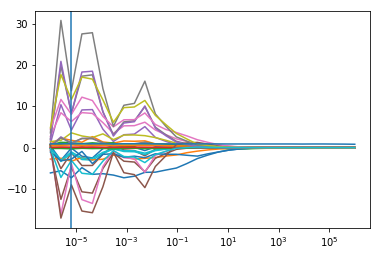

In [70]:
fig, ax = plt.subplots()
ax = plt.gca()
for i in range(0,31):
    ax.set_xscale('log')
    ax.plot(lam, c[i])

ax.axvline(x=6.723357536499335e-06)

In [71]:
#perform tuning and record the results C = 0.01, 0.001 and 0.0001 and regularization l1

var = np.zeros(shape = (30,31))
acc = list()
for i in range(0,30):
    model3 = LogisticRegression(penalty = 'l1', C = cc[i]).fit(x_train, y_train)
    label_predict3 = model3.predict(x_test)
    l = list(model3.coef_)[0]
    for j in range(0,30):
        var[i,j] = l[j]
    var[i,30] = accuracy_score(y_test, label_predict3)

c = pd.DataFrame(var)

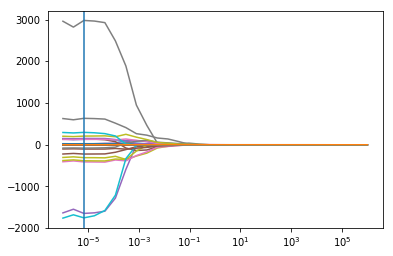

In [72]:
fig, ax = plt.subplots()
ax = plt.gca()
for i in range(0,31):
    ax.set_xscale('log')
    ax.plot(lam, c[i])

ax.set_xscale('log')
ax.plot(lam, c[30])
ax.axvline(x=6.723357536499335e-06)

## ROC Curve

In [131]:
data_col = data[data.columns[1:len(data.columns)]]
x_train, x_test, y_train, y_test = train_test_split(data_col, data.diagnosis, test_size=1/3, random_state=1)
y_test = np.where(y_test == "M", 1, 0)
y_train = np.where(y_train == "M", 1, 0)

In [134]:
from sklearn.preprocessing import binarize
from sklearn.metrics import auc, roc_curve
from sklearn.naive_bayes import GaussianNB

def rocfinder(m):
    nt = 10
    n = np.shape(y_test)[0]
    tpLog = []
    fpLog = []
    thresh = np.linspace(0, 0.9, nt)
    prob = m.predict_proba(x_test)[:,1]
    for i in thresh:
        #x = binarize([prob], i)[0]
        tpLogt = sum(((prob >= i) == True) & (y_test == 1)) / sum(y_test)
        fpLogt = sum((prob >= i) & (y_test == 0)) / sum(y_test == 0)
        tpLog.append(tpLogt)
        fpLog.append(fpLogt)
        fig, ax = plt.subplots()
        ax.plot(fpLog, tpLog)  
    
    print("auc is",auc(fpLog, tpLog), "for threshhold = ", i)

In [136]:
# Logistical model
m = LogisticRegression().fit(x_train, y_train)

auc is 0.988208699902 for threshhold =  0.9


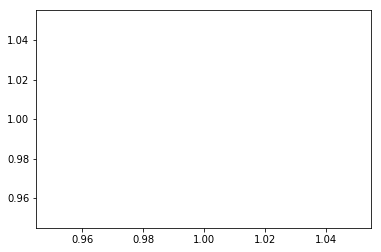

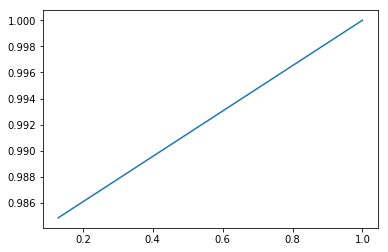

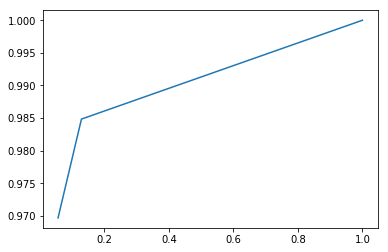

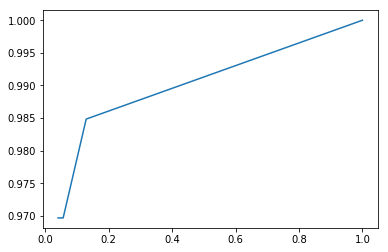

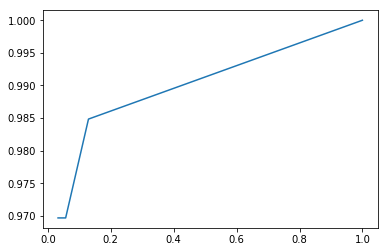

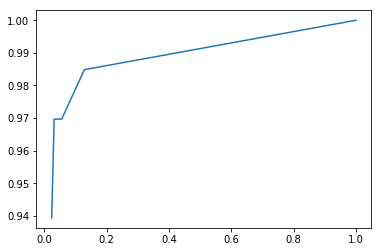

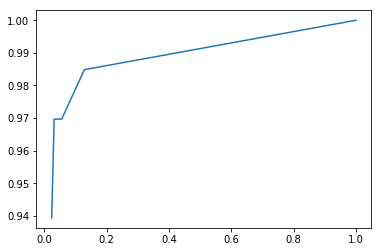

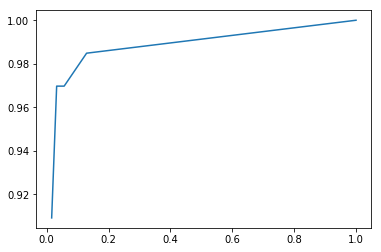

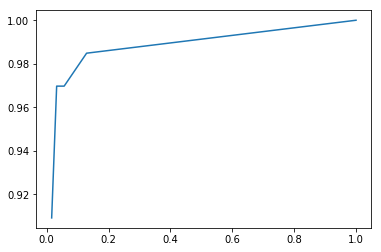

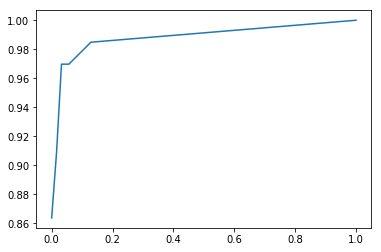

In [137]:
# Logistic model
m = LogisticRegression(penalty = 'l2', C = 1/6.723357536499335e-06).fit(x_train, y_train)

rocfinder(m)

In [138]:
# KNN's
#K Nearest Neighbours
knn_model_1 = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)
knn_model_2 = KNeighborsClassifier(n_neighbors=6).fit(x_train, y_train)
knn_model_3 = KNeighborsClassifier(n_neighbors=16).fit(x_train, y_train)

auc is 0.879215542522 for threshhold =  0.9


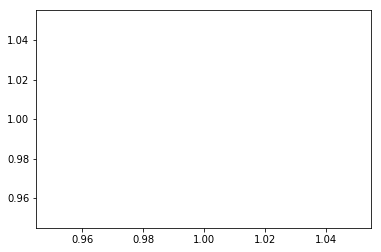

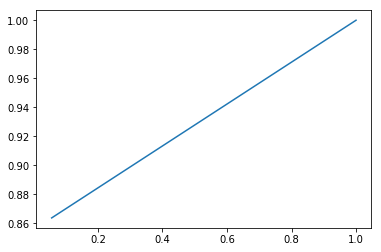

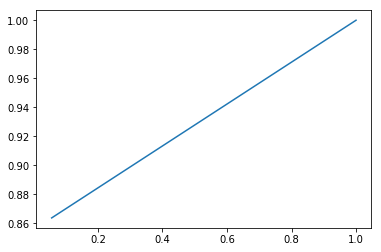

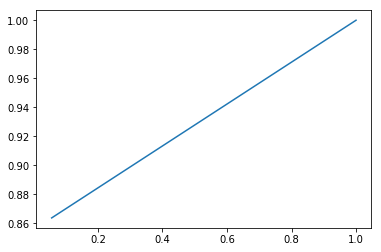

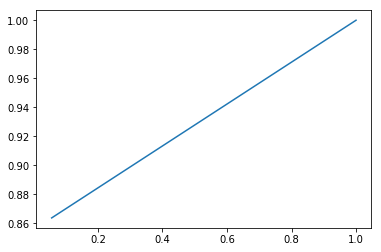

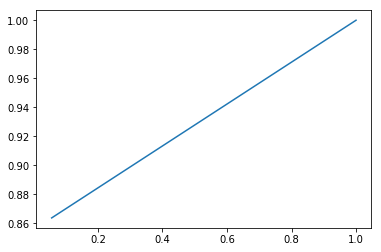

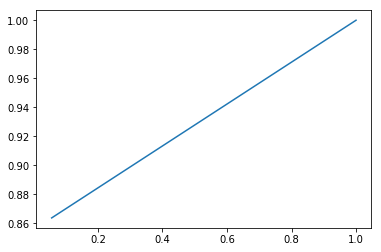

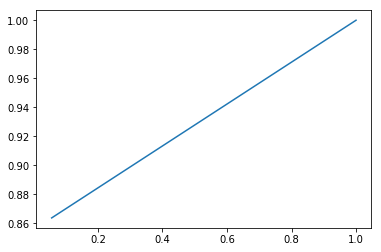

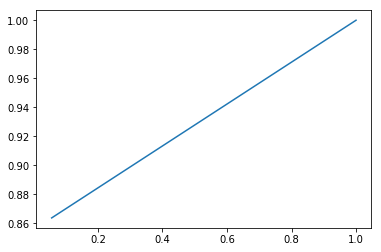

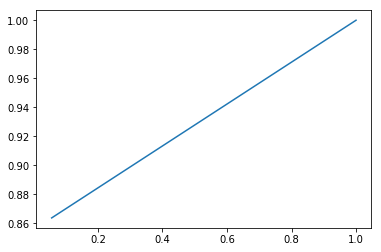

In [139]:
# KNN 1
rocfinder(knn_model_1)

auc is 0.952895894428 for threshhold =  0.9


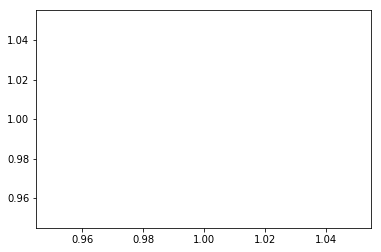

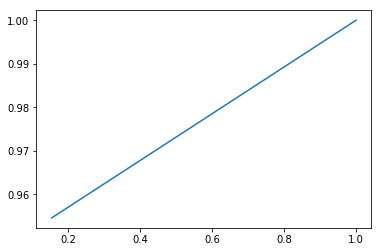

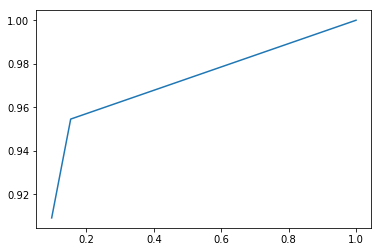

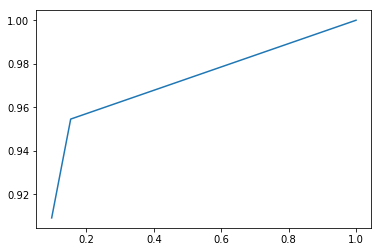

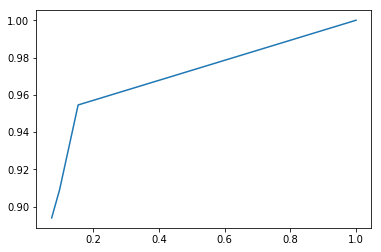

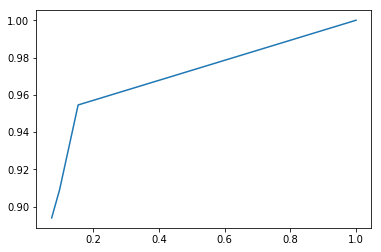

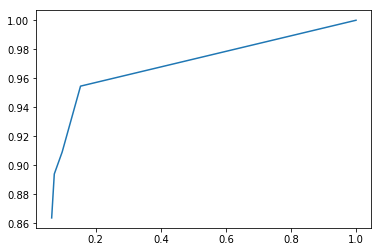

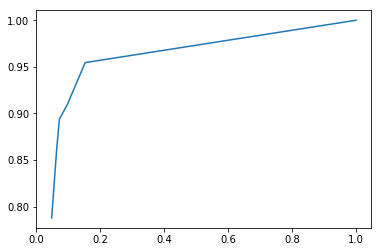

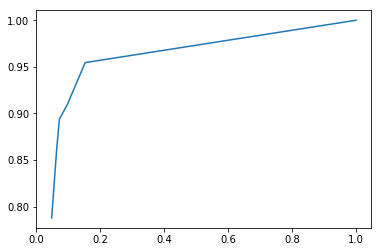

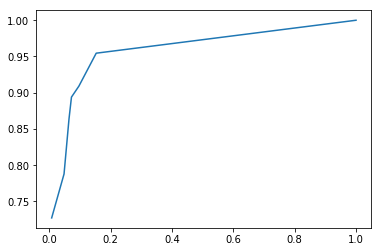

In [140]:
# KNN 2
rocfinder(knn_model_2)

auc is 0.956011730205 for threshhold =  0.9


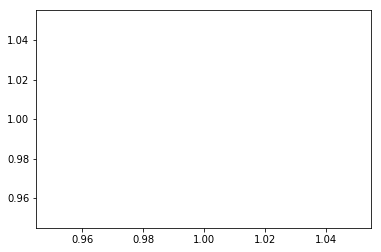

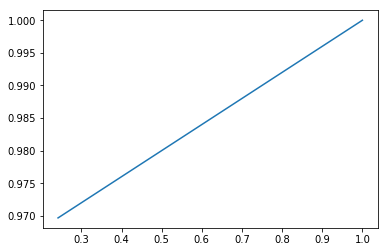

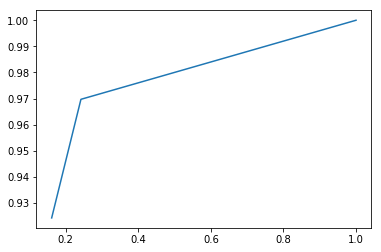

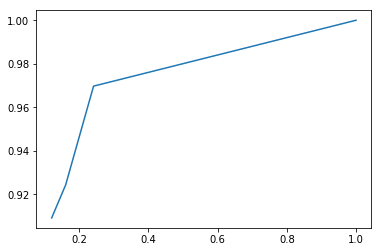

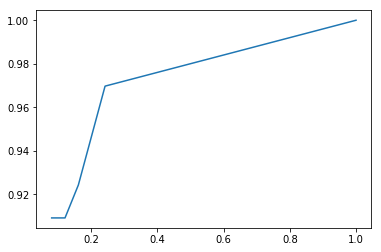

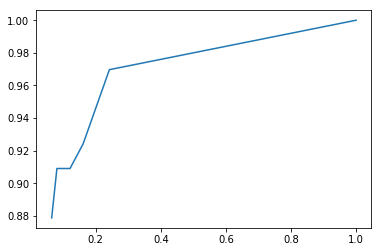

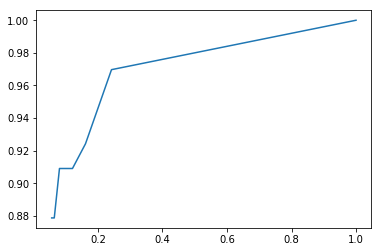

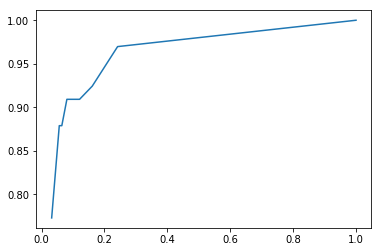

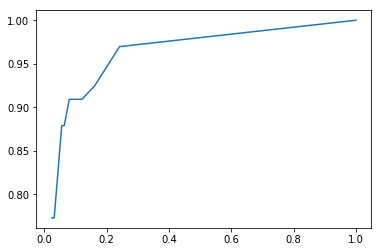

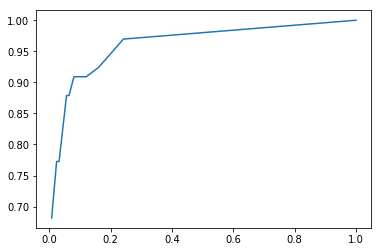

In [141]:
# KNN 3
rocfinder(knn_model_3)

In [142]:
# Naive Bayes
nb_model = GaussianNB().fit(x_train, y_train)

auc is 0.945136852395 for threshhold =  0.9


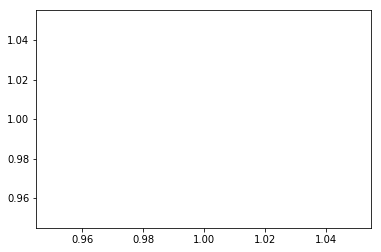

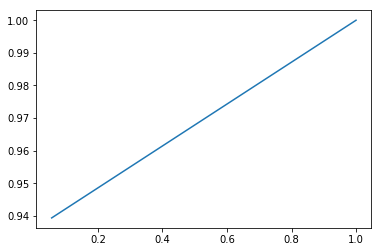

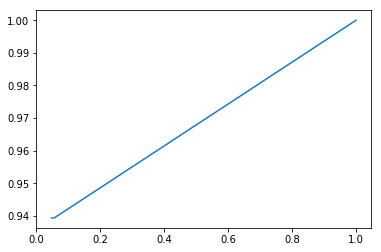

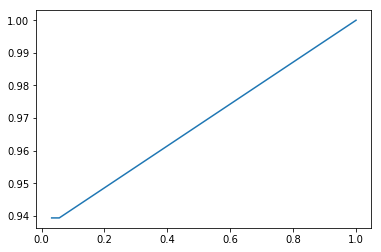

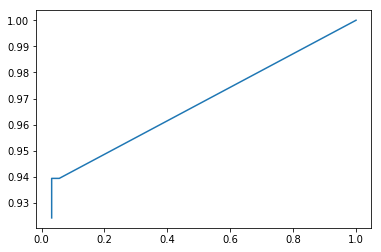

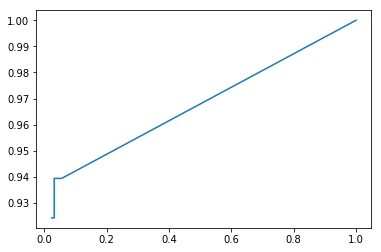

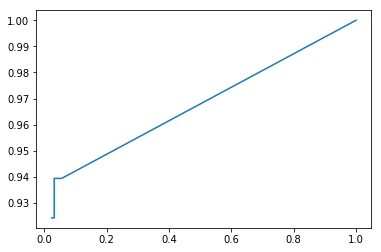

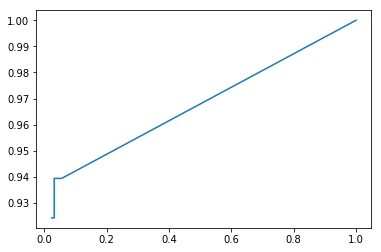

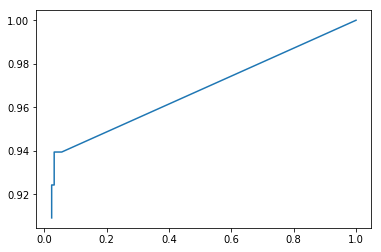

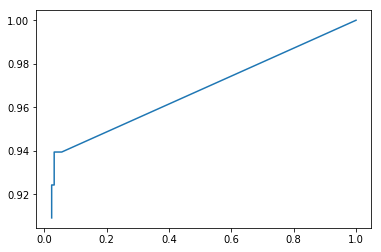

In [143]:
# Naive Bayes
rocfinder(nb_model)

Best threshold is observed for Logistic Regression and that is 0.9. 